<a href="https://colab.research.google.com/github/armandoordonez/stats_learning_book/blob/main/Ex_2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# based on https://botlnec.github.io/islp/sols/chapter2/exercise9/

pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/stats_learning_book/main/Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.00,4,140.00,86,2790,15.60,82,1,ford mustang gl
393,44.00,4,97.00,52,2130,24.60,82,2,vw pickup
394,32.00,4,135.00,84,2295,11.60,82,1,dodge rampage
395,28.00,4,120.00,79,2625,18.60,82,1,ford ranger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
df = df[df.horsepower != '?'].copy() # [1]
df['horsepower']=pd.to_numeric(df['horsepower'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino


In [9]:
quantitative = df.select_dtypes(include=['number']).columns
quantitative

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [10]:
qualitative = df.select_dtypes(exclude=['number']).columns
qualitative

Index(['name'], dtype='object')

In [11]:
a = df.describe()
a.loc['range'] = a.loc['max'] - a.loc['min']
a.loc['range']

mpg               37.60
cylinders          5.00
displacement     387.00
horsepower       184.00
weight         3,527.00
acceleration      16.80
year              12.00
origin             2.00
Name: range, dtype: float64

In [12]:
a.loc[['mean','std', 'range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
range,37.60,5.00,387.00,184.00,"3,527.00",16.80,12.00,2.00


In [13]:
df_b = df.drop(df.index[10:85])
b = df_b.describe()
b.loc['range'] = b.loc['max'] - b.loc['min']
b.loc[['mean','std', 'range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,24.37,5.38,187.88,101.00,"2,938.85",15.70,77.12,1.60
std,7.87,1.66,100.17,36.00,811.64,2.72,3.13,0.82
range,35.60,5.00,387.00,184.00,"3,348.00",16.30,12.00,2.00


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


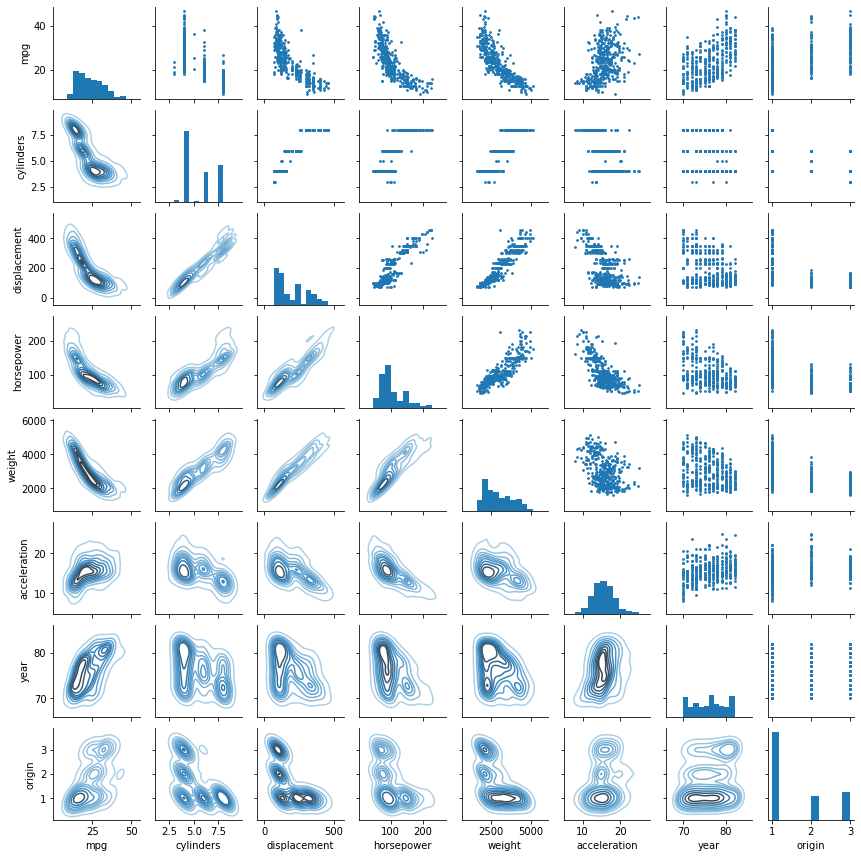

In [14]:
g = sns.PairGrid(df, size=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.fig.set_size_inches(12, 12)